### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1243]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [1244]:
data = pd.read_csv('data/coupons.csv')

In [1245]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [1246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [1247]:
data.iloc[:, : 13].head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed


In [1248]:
data.iloc[:, 13:23].head()

,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min
0,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0
1,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0
2,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0
3,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0
4,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0


In [1249]:
data.iloc[:, 23:].head()

,direction_same,direction_opp,Y
0,0,1,1
1,0,1,0
2,0,1,1
3,0,1,0
4,0,1,0


2. Investigate the dataset for missing or problematic data.

In [1250]:
# missing data
null_data = data.isnull().sum().to_frame()
null_data = null_data[null_data[0]>0]
null_data

,0
car,12576
Bar,107
CoffeeHouse,217
CarryAway,151
RestaurantLessThan20,130
Restaurant20To50,189


In [1251]:
null_data = null_data.rename(columns = {0:'missing_count'})
total = data.shape[0]
null_data['missing_percentage'] = null_data['missing_count'] / total
null_data

,missing_count,missing_percentage
car,12576,0.991485
Bar,107,0.008436
CoffeeHouse,217,0.017108
CarryAway,151,0.011905
RestaurantLessThan20,130,0.010249
Restaurant20To50,189,0.014901


3. Decide what to do about your missing data -- drop, replace, other...

In [1252]:
# Since more than 99% of all entries are missing the 'car' column, I will drop this column from consideration because it does not have enough data to reflect the entire dataset.
del data['car']

In [1253]:
# Now check how many rows would be dropped if we drop any rows with remaining missing values
data['is_null'] = data.isnull().any(axis=1)

In [1254]:
null_count = data['is_null'].sum()
null_count

605

In [1255]:
null_percentage = null_count / data.shape[0]
null_percentage

0.04769788710186061

In [1256]:
# clean up the temporary column
del data['is_null']

In [1257]:
# Since all remaining columns with missing data are category columns, fill the missing values with 'unknown' and keep them in the analysis for now
data = data.fillna('unknown')

In [1258]:
# get value counts
def get_value_counts(df, col):
    val_counts = df[col].value_counts()
    total = val_counts.sum()
    val_counts = val_counts.to_frame()
    val_counts['count_percentage'] = val_counts['count'] / total # percentage of counts    
    return val_counts

In [1259]:
# explore remaining value counts for columns with missing data
null_cols = null_data.index.to_list()
null_cols.remove('car') # remove car from the null_cols list
for col in null_cols:
    value_counts = get_value_counts(data, col)
    print(value_counts)
    print('-----------------------------------------------')

         count  count_percentage
Bar                             
never     5197          0.409729
less1     3482          0.274519
1~3       2473          0.194970
4~8       1076          0.084831
gt8        349          0.027515
unknown    107          0.008436
-----------------------------------------------
             count  count_percentage
CoffeeHouse                         
less1         3385          0.266872
1~3           3225          0.254257
never         2962          0.233523
4~8           1784          0.140650
gt8           1111          0.087591
unknown        217          0.017108
-----------------------------------------------
           count  count_percentage
CarryAway                         
1~3         4672          0.368338
4~8         4258          0.335699
less1       1856          0.146326
gt8         1594          0.125670
never        153          0.012062
unknown      151          0.011905
-----------------------------------------------
                

4. What proportion of the total observations chose to accept the coupon? 



In [1260]:
# get acceptance rate of the data or any subset
def get_acceptance_rate(df):
    accepted = df[df['Y']==1]['Y'].sum()
    total = df.shape[0]
    acceptance_rate = accepted / total
    return acceptance_rate

In [1261]:
total_acceptance_rate = get_acceptance_rate(data)
total_acceptance_rate

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Coupon Counts')

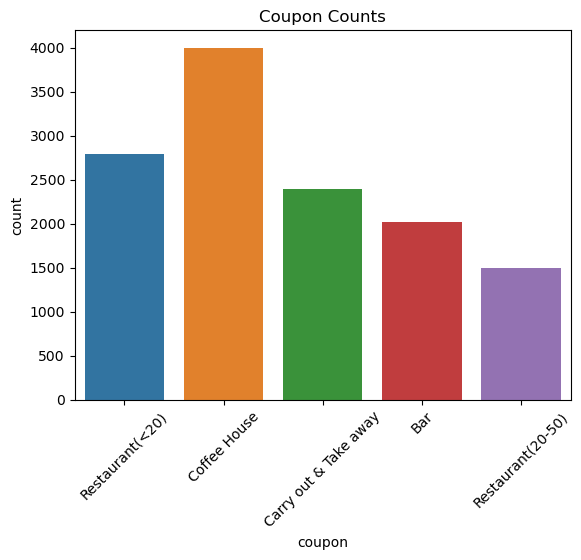

In [1262]:
sns.countplot(x='coupon', data=data)
plt.xticks(rotation=45)
plt.title('Coupon Counts')

In [1263]:
# coupon value counts
get_value_counts(data,'coupon')

,count,count_percentage
coupon,,
Coffee House,3996,0.315043
Restaurant(<20),2786,0.219647
Carry out & Take away,2393,0.188663
Bar,2017,0.159019
Restaurant(20-50),1492,0.117629


6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

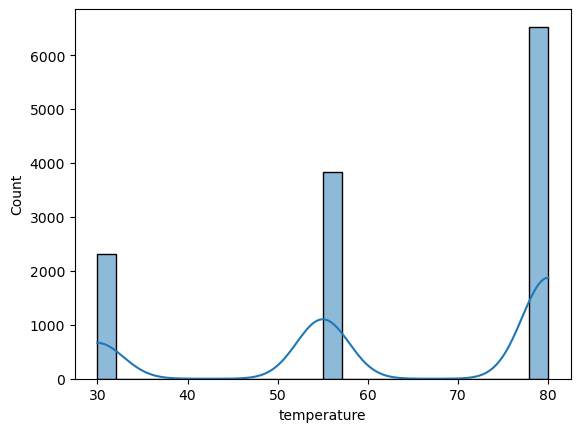

In [1264]:
sns.histplot(data['temperature'],kde=True)

In [1265]:
# temperature value counts
get_value_counts(data,'temperature')
# doesn't seem numeric or continuous after all, since there are only 3 values

,count,count_percentage
temperature,,
80,6528,0.514664
55,3840,0.302744
30,2316,0.182592


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [1266]:
# bar coupon value count
bar_coupon_data = data[data['coupon']=='Bar']
bar_coupon_data.shape[0] # check against value count above

2017

2. What proportion of bar coupons were accepted?


In [1267]:
bar_coupon_acceptance_rate = get_acceptance_rate(bar_coupon_data)
bar_coupon_acceptance_rate

0.41001487357461575

**Finding: 41% of bar coupons were accepted.**

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [1268]:
less_than_3 = ['never','less1','1~3']
more_than_3 = ['4~8','gt8']

# get acceptance rates for each criteria
bar_fewer_than_3 = bar_coupon_data[bar_coupon_data['Bar'].isin(less_than_3)]
bar_fewer_than_3_acceptance_rate = get_acceptance_rate(bar_fewer_than_3)
print(bar_fewer_than_3_acceptance_rate)

bar_more_than_3 = bar_coupon_data[bar_coupon_data['Bar'].isin(more_than_3)]
bar_more_than_3_acceptance_rate = get_acceptance_rate(bar_more_than_3)
print(bar_more_than_3_acceptance_rate)

print()

# calculate difference to help construct the finding sentence
diff = bar_more_than_3_acceptance_rate - bar_fewer_than_3_acceptance_rate
print(diff)

0.37061769616026713
0.7688442211055276

0.3982265249452605


**Finding: Drivers who went to a bar more than 3 times a month are almost 40% more likely to accept the coupon than those who went less.**

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [1269]:
# age value count
get_value_counts(data,'age')

,count,count_percentage
age,,
21,2653,0.209161
26,2559,0.201750
31,2039,0.160754
50plus,1788,0.140965
36,1319,0.103989
41,1093,0.086172
46,686,0.054084
below21,547,0.043125


In [1270]:
bar_more_than_1 = ['1~3','4~8','gt8']
age_more_than_25 = ['26','31','36','41','46','50plus']

# get acceptance rates for each criteria
data_4a = bar_coupon_data[(bar_coupon_data['Bar'].isin(bar_more_than_1)) & (bar_coupon_data['age'].isin(age_more_than_25))]
data_4a_acceptance_rate = get_acceptance_rate(data_4a)
print(data_4a_acceptance_rate)

data_4b = bar_coupon_data[~bar_coupon_data.index.isin(data_4a.index)]
data_4b_acceptance_rate = get_acceptance_rate(data_4b)
print(data_4b_acceptance_rate)

print()

# calculate difference to help construct the finding sentence
diff = data_4a_acceptance_rate - data_4b_acceptance_rate
print(diff)

0.6952380952380952
0.33500313087038197

0.36023496436771324


**Finding: Drivers who go to a bar more than once a month and are over the age of 25 are 36% more likely than all other to accept the coupon.**

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [1271]:
# passenager value counts
get_value_counts(data,'passanger')

,count,count_percentage
passanger,,
Alone,7305,0.575922
Friend(s),3298,0.260013
Partner,1075,0.084752
Kid(s),1006,0.079313


In [1272]:
# occupation value counts
get_value_counts(data,'occupation')

,count,count_percentage
occupation,,
Unemployed,1870,0.147430
Student,1584,0.124882
Computer & Mathematical,1408,0.111006
Sales & Related,1093,0.086172
Education&Training&Library,943,0.074346
Management,838,0.066067
Office & Administrative Support,639,0.050378
Arts Design Entertainment Sports & Media,629,0.049590
Business & Financial,544,0.042889


In [1273]:
# Compare drivers across the 3 criteria
data_5a = bar_coupon_data[bar_coupon_data['Bar'].isin(bar_more_than_1)]
data_5b = bar_coupon_data[bar_coupon_data['passanger']!='Kid(s)']
data_5c = bar_coupon_data[bar_coupon_data['occupation']!='Farming Fishing & Forestry']

# get acceptance rates for each criteria
data_5a_acceptance_rate = get_acceptance_rate(data_5a)
data_5b_acceptance_rate = get_acceptance_rate(data_5b)
data_5c_acceptance_rate = get_acceptance_rate(data_5c)
print(data_5a_acceptance_rate)
print(data_5b_acceptance_rate)
print(data_5c_acceptance_rate)

print()

# calculate differences to help construct the finding sentence
diff1 = data_5a_acceptance_rate - data_5b_acceptance_rate
diff2 = data_5a_acceptance_rate - data_5c_acceptance_rate
print(diff1)
print(diff2)

0.6879194630872483
0.43290999447818884
0.4098605577689243

0.25500946860905943
0.27805890531832395


**Finding: Drivers who go to bars more than once a month are almost 26% more likely than drivers who had passengers that were not a kid and almost 28% more likely than drivers who had occupations other than farming, fishing, or forestry to accept the coupon.**

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [1274]:
# get marital status value counts
get_value_counts(data,'maritalStatus')

,count,count_percentage
maritalStatus,,
Married partner,5100,0.402081
Single,4752,0.374645
Unmarried partner,2186,0.172343
Divorced,516,0.040681
Widowed,130,0.010249


In [1275]:
# cheap restaurant value counts
get_value_counts(data,'RestaurantLessThan20')

,count,count_percentage
RestaurantLessThan20,,
1~3,5376,0.423841
4~8,3580,0.282245
less1,2093,0.165011
gt8,1285,0.101309
never,220,0.017345
unknown,130,0.010249


In [1276]:
# income value counts
get_value_counts(data,'income')

,count,count_percentage
income,,
$25000 - $37499,2013,0.158704
$12500 - $24999,1831,0.144355
$37500 - $49999,1805,0.142305
$100000 or More,1736,0.136865
$50000 - $62499,1659,0.130795
Less than $12500,1042,0.082151
$87500 - $99999,895,0.070561
$75000 - $87499,857,0.067565
$62500 - $74999,846,0.066698


In [1277]:
# filter subsets for each criteria
data_6a = bar_coupon_data[(bar_coupon_data['Bar'].isin(bar_more_than_1)) & (bar_coupon_data['passanger']!='Kid(s)') & (bar_coupon_data['maritalStatus']!='Widowed')]

age_below_30 = ['21','26','below21']
data_6b = bar_coupon_data[(bar_coupon_data['Bar'].isin(bar_more_than_1)) & (bar_coupon_data['age'].isin(age_below_30))]

cheap_restaurant_more_than_4 = ['4~8','gt8']
income_less_than_50K = ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']
data_6c = bar_coupon_data[(bar_coupon_data['RestaurantLessThan20'].isin(cheap_restaurant_more_than_4)) & (bar_coupon_data['income'].isin(income_less_than_50K))]

In [1278]:
# get acceptance rates for each criteria
data_6a_acceptance_rate = get_acceptance_rate(data_6a)
data_6b_acceptance_rate = get_acceptance_rate(data_6b)
data_6c_acceptance_rate = get_acceptance_rate(data_6c)

print(data_6a_acceptance_rate)
print(data_6b_acceptance_rate)
print(data_6c_acceptance_rate)

print()

# calculate differences to help construct the finding sentence
diff1 = data_6a_acceptance_rate - data_6c_acceptance_rate
diff2 = data_6b_acceptance_rate - data_6c_acceptance_rate
print(diff1)
print(diff2)

0.7132486388384754
0.7217391304347827
0.45348837209302323

0.2597602667454522
0.26825075834175943


**Finding: Drivers who go to cheap restaurants more than 4 times a month and whose income is less than 50K are almost 26% less likely than those who go to bars more than once a month, had passengers that were not a kid, and were not widowed and almost 27% less likely than those who go to bars more than once a month and are under the age of 30 to accept the coupon.**

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the above observations, I hypothesize that drivers who go to bars more often are more likely to accept the coupon.

However, in order to determine the impact of each column and their values on the acceptance rate, I would like to examine the acceptance rate of each column and their values systematically, to identify the profiles of drivers who are most likely to accept the coupons.

I will do this next in Independent Investigation.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### Choose a Coupon Type

In [1279]:
# Choose a coupon type
analyze_column(data,'coupon')

  category                  value   yes  cat_total  yes_rate
1   coupon  Carry out & Take away  1760       2393  0.735478
4   coupon        Restaurant(<20)  1970       2786  0.707107
2   coupon           Coffee House  1995       3996  0.499249
3   coupon      Restaurant(20-50)   658       1492  0.441019
0   coupon                    Bar   827       2017  0.410015

----------------------------------------------------------------------------------



,category,value,yes,cat_total,yes_rate,std_dev,avg
1,coupon,Carry out & Take away,1760,2393,0.735478,0.152287,0.558574
4,coupon,Restaurant(<20),1970,2786,0.707107,0.152287,0.558574
2,coupon,Coffee House,1995,3996,0.499249,0.152287,0.558574
3,coupon,Restaurant(20-50),658,1492,0.441019,0.152287,0.558574
0,coupon,Bar,827,2017,0.410015,0.152287,0.558574


#### Examine and Adjust Columns

In [1280]:
# Get a list of the columns
columns = data.columns.to_list()
columns.remove('Y')
columns

['destination',
 'passanger',
 'weather',
 'temperature',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'has_children',
 'education',
 'occupation',
 'income',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50',
 'toCoupon_GEQ5min',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'direction_opp']

In [1281]:
# combine direction columns
data['direction'] = np.where(data['direction_same'] == 1, 'same', 'opposite')
data.iloc[:, 22:].sample(5)

,direction_same,direction_opp,Y,direction
7021,0,1,0,opposite
5265,0,1,1,opposite
7596,0,1,0,opposite
8229,0,1,0,opposite
10182,1,0,0,same


In [1282]:
# combine toCoupon columns
data['toCoupon'] = np.where(data['toCoupon_GEQ25min'] == 1, 25,
                           np.where(data['toCoupon_GEQ15min'] == 1, 15,
                                    np.where(data['toCoupon_GEQ5min'] == 1, 5, None)))
data.iloc[:, 19:].sample(5)

,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,direction,toCoupon
9486,1,1,1,0,1,0,opposite,25
5070,1,0,0,0,1,0,opposite,5
11059,1,0,0,0,1,0,opposite,5
12221,1,0,0,0,1,1,opposite,5
6064,1,1,0,1,0,0,same,15


In [1283]:
# remove original columns
remove_cols = ['direction_same','direction_opp','toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']
data = data.drop(remove_cols, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

In [1284]:
# Get a list of the columns again
columns = data.columns.to_list()
columns.remove('Y')
columns

['destination',
 'passanger',
 'weather',
 'temperature',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'has_children',
 'education',
 'occupation',
 'income',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50',
 'direction',
 'toCoupon']

In [1285]:
len(columns)

21

#### Get Acceptance Rates

In [1304]:
# Analyze acceptance rate for each category value
# For each category in the column, calculate the acceptance rate
# Plot the acceptance rates in a bar graph
# Return a dataframe with the column, category, and acceptance rate (yes_rate)
def analyze_column(df,col,print_count=True,print_ratio=True,print_table=True):
    # create pivot table
    df_ = df.groupby([col, 'Y']).size().to_frame().reset_index().rename(columns = {col:'value',0:'count'})
    df_ = df_.pivot(index='value', columns='Y', values='count').reset_index()
    df_ = df_.rename(columns = {0:'no',1:'yes'})
    df_.columns.name = None
    df_ = df_.fillna(0) # if no counts for yes or no, just put 0
    
    # calculate acceptance rate and rejection rate
    df_['category'] = col
    df_['cat_total'] = df_['no']+df_['yes']
    df_['no_rate'] = df_['no'] / df_['cat_total']
    df_['yes_rate'] = df_['yes'] / df_['cat_total']
    df_['std_dev'] = df_['yes_rate'].std()
    df_['avg'] = df_['yes_rate'].mean()
    df_ = df_.sort_values('yes_rate')
    
    # if print_count
    if print_count:
        # plot counts
        fig = px.bar(df_[df_['category']==col].sort_values(by='cat_total',ascending=False), 
                     x='value', y='cat_total', 
                     labels={'cat_total':'number of responses','value':''},
                     title='Number of Responses for '+col,
                     width=800,height=400)
        fig.show()       
        
    # if print_ratio
    if print_ratio:
        # plot ratios
        categories = df_['value'].tolist()
        fig = px.bar(df_, x='value', y=['yes_rate','no_rate'],
                     barmode='stack',
                     labels={'category':col,'_value':'acceptance rate'},
                     title='Acceptance Rates Within '+col,
                     width=800,height=400)
        fig.show()
        
    # prepare dataframe to return: remove unnecessary columns and sort by highest acceptance rate first
    df_ = df_.sort_values(by='yes_rate',ascending=False)
    df_ = df_[['category','value','yes','cat_total','yes_rate','std_dev','avg']]
    df_['cat_total'] = df_['cat_total'].astype(int)
    df_['yes'] = df_['yes'].astype(int)

    # print dataframe if print_table
    if print_table:
        print(df_[['category','value','yes','cat_total','yes_rate']])
        print()
        print('----------------------------------------------------------------------------------')
        print()
    return df_

In [1310]:
# Iterate through each column and call analyze_column on it
# Combine all the acceptance rates across all columns along with the column and category
# Return dataframe with combined and sorted acceptance rates
def get_sorted_rates(df,print_cat=True,print_count=True,print_ratio=True,print_table=True):
    # dataframe for combined acceptance rates
    rate_data = pd.DataFrame()
    
    for col in columns:
        if print_cat:
            print(col.upper())
        
        # call analyze_column
        col_rate_data = analyze_column(df,col,print_count,print_ratio,print_table)
        
        # add to combined dataframe
        if(rate_data.empty):
            rate_data = col_rate_data
        else:
            rate_data = pd.concat([rate_data, col_rate_data])
            
    # sort by highest acceptance rate
    rate_data = rate_data.sort_values(by='yes_rate',ascending=False)
    
    return rate_data

In [1311]:
# Carry out & Take away coupons
coupon_data = data[data['coupon']=='Carry out & Take away']

# plot acceptance rates for each column
sorted_rates = get_sorted_rates(coupon_data)

DESTINATION


      category            value  yes  cat_total  yes_rate
0  destination             Home  515        653  0.788668
1  destination  No Urgent Place  746        978  0.762781
2  destination             Work  499        762  0.654856

----------------------------------------------------------------------------------

PASSANGER


    category      value   yes  cat_total  yes_rate
1  passanger  Friend(s)   560        739  0.757781
3  passanger    Partner    71         97  0.731959
0  passanger      Alone  1022       1405  0.727402
2  passanger     Kid(s)   107        152  0.703947

----------------------------------------------------------------------------------

WEATHER


  category  value   yes  cat_total  yes_rate
2  weather  Sunny  1348       1767  0.762875
1  weather  Snowy   217        307  0.706840
0  weather  Rainy   195        319  0.611285

----------------------------------------------------------------------------------

TEMPERATURE


      category  value  yes  cat_total  yes_rate
0  temperature     30  568        751  0.756325
2  temperature     80  778       1066  0.729831
1  temperature     55  414        576  0.718750

----------------------------------------------------------------------------------

TIME


  category value  yes  cat_total  yes_rate
2     time   2PM  189        218  0.866972
3     time   6PM  359        435  0.825287
1     time  10PM  350        461  0.759219
0     time  10AM  363        517  0.702128
4     time   7AM  499        762  0.654856

----------------------------------------------------------------------------------

COUPON


  category                  value   yes  cat_total  yes_rate
0   coupon  Carry out & Take away  1760       2393  0.735478

----------------------------------------------------------------------------------

EXPIRATION


     category value   yes  cat_total  yes_rate
0  expiration    1d  1138       1456  0.781593
1  expiration    2h   622        937  0.663821

----------------------------------------------------------------------------------

GENDER


  category   value  yes  cat_total  yes_rate
1   gender    Male  875       1153   0.75889
0   gender  Female  885       1240   0.71371

----------------------------------------------------------------------------------

AGE


  category    value  yes  cat_total  yes_rate
6      age   50plus  268        346  0.774566
3      age       36  186        249  0.746988
0      age       21  360        486  0.740741
1      age       26  344        470  0.731915
7      age  below21   83        114  0.728070
5      age       46   91        125  0.728000
4      age       41  150        209  0.717703
2      age       31  278        394  0.705584

----------------------------------------------------------------------------------

MARITALSTATUS


        category              value  yes  cat_total  yes_rate
4  maritalStatus            Widowed   22         26  0.846154
2  maritalStatus             Single  693        928  0.746767
1  maritalStatus    Married partner  690        943  0.731707
0  maritalStatus           Divorced   78        108  0.722222
3  maritalStatus  Unmarried partner  277        388  0.713918

----------------------------------------------------------------------------------

HAS_CHILDREN


       category  value   yes  cat_total  yes_rate
1  has_children      1   759       1026  0.739766
0  has_children      0  1001       1367  0.732260

----------------------------------------------------------------------------------

EDUCATION


    category                                   value  yes  cat_total  yes_rate
4  education                        Some High School   15         16  0.937500
0  education                       Associates degree  179        219  0.817352
5  education                Some college - no degree  617        807  0.764560
3  education                    High School Graduate  135        181  0.745856
1  education                        Bachelors degree  580        812  0.714286
2  education  Graduate degree (Masters or Doctorate)  234        358  0.653631

----------------------------------------------------------------------------------

OCCUPATION


      category                                      value  yes  cat_total  \
2   occupation  Building & Grounds Cleaning & Maintenance    9          9   
19  occupation                         Protective Service   30         31   
6   occupation                  Construction & Extraction   27         28   
10  occupation       Healthcare Practitioners & Technical   40         45   
11  occupation                         Healthcare Support   40         48   
9   occupation         Food Preparation & Serving Related   52         63   
3   occupation                       Business & Financial   85        104   
23  occupation           Transportation & Material Moving   31         38   
8   occupation                 Farming Fishing & Forestry    8         10   
15  occupation                                 Management  115        146   
16  occupation            Office & Administrative Support   95        123   
17  occupation                    Personal Care & Service   28         37   

  category             value  yes  cat_total  yes_rate
2   income   $25000 - $37499  296        382  0.774869
4   income   $50000 - $62499  227        294  0.772109
1   income   $12500 - $24999  259        344  0.752907
8   income  Less than $12500  159        212  0.750000
5   income   $62500 - $74999  114        157  0.726115
7   income   $87500 - $99999  123        171  0.719298
3   income   $37500 - $49999  243        341  0.712610
0   income   $100000 or More  228        323  0.705882
6   income   $75000 - $87499  111        169  0.656805

----------------------------------------------------------------------------------

BAR


  category    value  yes  cat_total  yes_rate
0      Bar      1~3  359        471  0.762208
4      Bar    never  743        984  0.755081
1      Bar      4~8  144        194  0.742268
3      Bar    less1  472        662  0.712991
2      Bar      gt8   37         66  0.560606
5      Bar  unknown    5         16  0.312500

----------------------------------------------------------------------------------

COFFEEHOUSE


      category    value  yes  cat_total  yes_rate
5  CoffeeHouse  unknown   25         32  0.781250
4  CoffeeHouse    never  436        571  0.763573
0  CoffeeHouse      1~3  447        598  0.747492
1  CoffeeHouse      4~8  257        347  0.740634
3  CoffeeHouse    less1  462        626  0.738019
2  CoffeeHouse      gt8  133        219  0.607306

----------------------------------------------------------------------------------

CARRYAWAY


    category    value  yes  cat_total  yes_rate
5  CarryAway  unknown   19         22  0.863636
1  CarryAway      4~8  618        820  0.753659
4  CarryAway    never   24         32  0.750000
2  CarryAway      gt8  223        302  0.738411
0  CarryAway      1~3  636        864  0.736111
3  CarryAway    less1  240        353  0.679887

----------------------------------------------------------------------------------

RESTAURANTLESSTHAN20


               category    value  yes  cat_total  yes_rate
4  RestaurantLessThan20    never   38         47  0.808511
2  RestaurantLessThan20      gt8  176        233  0.755365
1  RestaurantLessThan20      4~8  506        676  0.748521
0  RestaurantLessThan20      1~3  740       1019  0.726202
3  RestaurantLessThan20    less1  288        400  0.720000
5  RestaurantLessThan20  unknown   12         18  0.666667

----------------------------------------------------------------------------------

RESTAURANT20TO50


           category    value  yes  cat_total  yes_rate
5  Restaurant20To50  unknown   25         33  0.757576
1  Restaurant20To50      4~8  113        150  0.753333
0  Restaurant20To50      1~3  447        605  0.738843
4  Restaurant20To50    never  295        400  0.737500
3  Restaurant20To50    less1  848       1158  0.732297
2  Restaurant20To50      gt8   32         47  0.680851

----------------------------------------------------------------------------------

DIRECTION


    category     value   yes  cat_total  yes_rate
0  direction  opposite  1202       1600  0.751250
1  direction      same   558        793  0.703657

----------------------------------------------------------------------------------

TOCOUPON


   category  value  yes  cat_total  yes_rate
0  toCoupon      5  657        873  0.752577
2  toCoupon     25  194        265  0.732075
1  toCoupon     15  909       1255  0.724303

----------------------------------------------------------------------------------



#### Explore Results

In [1312]:
# didn't want to drop the unknown values because I wanted them to be included in the overall count
# but having the unknown values here doesn't make sense, so I'll drop them from the analysis
sorted_rates = sorted_rates[(sorted_rates['value']!='unknown') & (sorted_rates['category']!='coupon')]

##### Explore Different Sorting

In [1313]:
# Sorted by Acceptance Rate
sorted_rates.head(10)

,category,value,yes,cat_total,yes_rate,std_dev,avg
2,occupation,Building & Grounds Cleaning & Maintenance,9,9,1.000000,0.122715,0.756418
19,occupation,Protective Service,30,31,0.967742,0.122715,0.756418
6,occupation,Construction & Extraction,27,28,0.964286,0.122715,0.756418
4,education,Some High School,15,16,0.937500,0.097496,0.772198
10,occupation,Healthcare Practitioners & Technical,40,45,0.888889,0.122715,0.756418
2,time,2PM,189,218,0.866972,0.086742,0.761692
4,maritalStatus,Widowed,22,26,0.846154,0.053947,0.752154
11,occupation,Healthcare Support,40,48,0.833333,0.122715,0.756418
9,occupation,Food Preparation & Serving Related,52,63,0.825397,0.122715,0.756418
3,time,6PM,359,435,0.825287,0.086742,0.761692


In [1314]:
# Sorted by Category Totals
sorted_rates.sort_values(by='cat_total',ascending=False).head(10)

,category,value,yes,cat_total,yes_rate,std_dev,avg
2,weather,Sunny,1348,1767,0.762875,0.076649,0.693667
0,direction,opposite,1202,1600,0.751250,0.033653,0.727453
0,expiration,1d,1138,1456,0.781593,0.083278,0.722707
0,passanger,Alone,1022,1405,0.727402,0.022067,0.730272
0,has_children,0,1001,1367,0.732260,0.005307,0.736013
1,toCoupon,15,909,1255,0.724303,0.014607,0.736319
0,gender,Female,885,1240,0.713710,0.031947,0.736300
3,Restaurant20To50,less1,848,1158,0.732297,0.027535,0.733400
1,gender,Male,875,1153,0.758890,0.031947,0.736300
2,temperature,80,778,1066,0.729831,0.019307,0.734969


In [1315]:
# Sorted by the Number of Yes Responses
sorted_rates.sort_values(by='yes',ascending=False).head(10)

,category,value,yes,cat_total,yes_rate,std_dev,avg
2,weather,Sunny,1348,1767,0.762875,0.076649,0.693667
0,direction,opposite,1202,1600,0.751250,0.033653,0.727453
0,expiration,1d,1138,1456,0.781593,0.083278,0.722707
0,passanger,Alone,1022,1405,0.727402,0.022067,0.730272
0,has_children,0,1001,1367,0.732260,0.005307,0.736013
1,toCoupon,15,909,1255,0.724303,0.014607,0.736319
0,gender,Female,885,1240,0.713710,0.031947,0.736300
1,gender,Male,875,1153,0.758890,0.031947,0.736300
3,Restaurant20To50,less1,848,1158,0.732297,0.027535,0.733400
2,temperature,80,778,1066,0.729831,0.019307,0.734969


In [1316]:
# Explore category standard deviation and average (mean)
cat_data = sorted_rates.copy()
del cat_data['value']
del cat_data['yes']
del cat_data['yes_rate']
del cat_data['cat_total']
cat_data = cat_data.drop_duplicates()
cat_data.shape[0]

20

In [1317]:
# category standard deviation
cat_data = cat_data.sort_values(by='std_dev',ascending=False)
cat_data

,category,std_dev,avg
0,Bar,0.177493,0.640942
2,occupation,0.122715,0.756418
4,education,0.097496,0.772198
2,time,0.086742,0.761692
0,expiration,0.083278,0.722707
2,weather,0.076649,0.693667
0,destination,0.070974,0.735435
4,CoffeeHouse,0.062113,0.729712
1,CarryAway,0.060152,0.753617
4,maritalStatus,0.053947,0.752154


In [1318]:
# category average (mean)
cat_data.sort_values(by='avg',ascending=False)

,category,std_dev,avg
4,education,0.097496,0.772198
2,time,0.086742,0.761692
2,occupation,0.122715,0.756418
1,CarryAway,0.060152,0.753617
4,maritalStatus,0.053947,0.752154
4,RestaurantLessThan20,0.046764,0.737544
0,toCoupon,0.014607,0.736319
1,gender,0.031947,0.736300
1,has_children,0.005307,0.736013
0,destination,0.070974,0.735435


In [1319]:
# filter list of categories for std_dev > 0.07 and avg > 0.7
cat_data[(cat_data['std_dev']>0.07) & (cat_data['avg']>0.7)]

,category,std_dev,avg
2,occupation,0.122715,0.756418
4,education,0.097496,0.772198
2,time,0.086742,0.761692
0,expiration,0.083278,0.722707
0,destination,0.070974,0.735435


#### Distribution of Acceptance Rates for Carry out & Take away Coupons

In [1320]:
# Distribution for Acceptance Rates for Carry out & Take away Coupons
fig = px.histogram(sorted_rates, x='yes_rate', title='Distribution of Acceptance Rates for Carry out & Take away Coupons')
fig.show()

##### Correlation between Acceptance Rates and Category Totals

In [1321]:
# Explore how the category count correlates with the acceptance rates
fig = px.scatter(sorted_rates, x='cat_total', y='yes_rate', color='category', size='yes', labels={'yes_rate':'Acceptance Rate','cat_total':'Category Total', 'category':'Categories'}, title='Acceptance Rate per Category Total')
fig.show()
# The larger the bubble, the more impactful that category value was in this survey

#### Highest Acceptance Rates

15 values across 5 categories resulted in greater than a 80% acceptance rate. However, because the numbers of each category tended to be small for each value, attention should be paid to the standard deviation and the average acceptance rate within each category before targeting ad campaigns. We want to make sure that the ad campaign targeting has a large enough audience to be cost-effective.

In [1366]:
# get acceptance rates >80%
highest_rate_data = sorted_rates[sorted_rates['yes_rate']>=0.8].copy()
del highest_rate_data['std_dev']
del highest_rate_data['avg']
highest_rate_data

,category,value,yes,cat_total,yes_rate
2,occupation,Building & Grounds Cleaning & Maintenance,9,9,1.000000
19,occupation,Protective Service,30,31,0.967742
6,occupation,Construction & Extraction,27,28,0.964286
4,education,Some High School,15,16,0.937500
10,occupation,Healthcare Practitioners & Technical,40,45,0.888889
2,time,2PM,189,218,0.866972
4,maritalStatus,Widowed,22,26,0.846154
11,occupation,Healthcare Support,40,48,0.833333
9,occupation,Food Preparation & Serving Related,52,63,0.825397
3,time,6PM,359,435,0.825287


In [1323]:
highest_rate_data.shape[0]

15

#### Lowest Acceptance Rates

In [1367]:
# get acceptance rates <70%
lowest_rate_data = sorted_rates[sorted_rates['yes_rate']<=0.7].sort_values(by='yes_rate',ascending=True).copy()
del lowest_rate_data['std_dev']
del lowest_rate_data['avg']
lowest_rate_data

,category,value,yes,cat_total,yes_rate
14,occupation,Life Physical Social Science,15,30,0.500000
13,occupation,Legal,22,41,0.536585
2,Bar,gt8,37,66,0.560606
2,CoffeeHouse,gt8,133,219,0.607306
0,weather,Rainy,195,319,0.611285
12,occupation,Installation Maintenance & Repair,15,24,0.625000
0,occupation,Architecture & Engineering,19,30,0.633333
1,occupation,Arts Design Entertainment Sports & Media,73,115,0.634783
2,education,Graduate degree (Masters or Doctorate),234,358,0.653631
4,time,7AM,499,762,0.654856


In [1325]:
lowest_rate_data.shape[0]

16

#### Medium Acceptance Rates

In [1326]:
# get acceptance rates >70% and <80%
medium_rate_data = sorted_rates[(sorted_rates['yes_rate']>0.7) & (sorted_rates['yes_rate']<0.8)].sort_values(by='yes_rate',ascending=True)
medium_rate_data

,category,value,yes,cat_total,yes_rate,std_dev,avg
0,time,10AM,363,517,0.702128,0.086742,0.761692
1,direction,same,558,793,0.703657,0.033653,0.727453
2,passanger,Kid(s),107,152,0.703947,0.022067,0.730272
2,age,31,278,394,0.705584,0.020730,0.734196
0,income,$100000 or More,228,323,0.705882,0.037219,0.730066
...,...,...,...,...,...,...,...
6,age,50plus,268,346,0.774566,0.020730,0.734196
2,income,$25000 - $37499,296,382,0.774869,0.037219,0.730066
0,expiration,1d,1138,1456,0.781593,0.083278,0.722707
15,occupation,Management,115,146,0.787671,0.122715,0.756418


### Findings

_**Prompt:** Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons._ 

#### Carry out & Take away Coupons

Based my investigations, I will report findings for the **_Carry out & Take away_** coupon type. This is the coupon type with the highest acceptance rate, ranging from 50% to 100%.

In [1357]:
coupon_rates = analyze_column(data,'coupon',False,True,False)

#### The Problem for Carry out & Take away Coupons

The problem is to find out what scenarios and driver characteristics result in higher acceptance rates for _Carry out & Take away_ coupons.

#### Findings: Highest Acceptance Rates
The highest acceptance rates come from 15 values across 5 categories:
- occupation (9 out of 15 values are specific occupations)
  - Building & Grounds Cleaning & Maintenance
  - Protective Service
  - Construction & Extraction
  - Healthcare Practitioners & Technical
  - Healthcare Support
  - Food Preparation & Serving Related
  - Business & Financial
  - Transportation & Material Moving
  - Farming Fishing & Forestry
- education = 'Some High School' and 'Associates degree'
- widows
- time of day = 2PM and 6PM (this makes sense that people would say no to a coupon while on the way to work in the morning)
- people who _never_ go to cheap restaurants (these seem to prefer to take away food to eat at home instead)

#### Appendix: Highest Acceptance Rates

In [1384]:
highest_rate_data[['category','value','yes_rate']]

,category,value,yes_rate
2,occupation,Building & Grounds Cleaning & Maintenance,1.000000
19,occupation,Protective Service,0.967742
6,occupation,Construction & Extraction,0.964286
4,education,Some High School,0.937500
10,occupation,Healthcare Practitioners & Technical,0.888889
2,time,2PM,0.866972
4,maritalStatus,Widowed,0.846154
11,occupation,Healthcare Support,0.833333
9,occupation,Food Preparation & Serving Related,0.825397
3,time,6PM,0.825287


In [1359]:
len(highest_rate_data['category'].unique())

5

In [1360]:
len(highest_rate_data['value'].unique())

15

In [1361]:
occupation_rates = highest_rate_data[highest_rate_data['category']=='occupation']
occupation_rates

,category,value,yes,cat_total,yes_rate
2,occupation,Building & Grounds Cleaning & Maintenance,9,9,1.000000
19,occupation,Protective Service,30,31,0.967742
6,occupation,Construction & Extraction,27,28,0.964286
10,occupation,Healthcare Practitioners & Technical,40,45,0.888889
11,occupation,Healthcare Support,40,48,0.833333
9,occupation,Food Preparation & Serving Related,52,63,0.825397
3,occupation,Business & Financial,85,104,0.817308
23,occupation,Transportation & Material Moving,31,38,0.815789
8,occupation,Farming Fishing & Forestry,8,10,0.800000


In [1362]:
occupation_rates.shape[0]

9

In [1378]:
# Plot the highest acceptance rates by category
fig = px.bar(highest_rate_data, x='value', y='yes_rate', color='category', labels={'yes_rate':'acceptance rate','value':''}, title='Highest Acceptance Rates by Category for Carry out & Take away Coupons')
fig.show()

#### Appendix: Lowest Acceptance Rates

In [1385]:
lowest_rate_data[['category','value','yes_rate']]

,category,value,yes_rate
14,occupation,Life Physical Social Science,0.500000
13,occupation,Legal,0.536585
2,Bar,Bar - gt8,0.560606
2,CoffeeHouse,CoffeeHouse - gt8,0.607306
0,weather,Rainy,0.611285
12,occupation,Installation Maintenance & Repair,0.625000
0,occupation,Architecture & Engineering,0.633333
1,occupation,Arts Design Entertainment Sports & Media,0.634783
2,education,Graduate degree (Masters or Doctorate),0.653631
4,time,7AM,0.654856


In [1369]:
len(lowest_rate_data['category'].unique())

11

In [1370]:
len(lowest_rate_data['value'].unique())

14

In [1375]:
# Rename duplicate values

lowest_rate_data['value'][lowest_rate_data['value'] == 'gt8'] = lowest_rate_data['category']+' - '+lowest_rate_data['value']

/tmp/ipykernel_22551/3252949058.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1379]:
# Plot the lowest acceptance rates by category
fig = px.bar(lowest_rate_data, x='value', y='yes_rate', color='category', labels={'yes_rate':'acceptance rate','value':''}, title='Lowest Acceptance Rates by Category for Carry out & Take away Coupons')
fig.show()